Optimal Energy Group Indices: [ 15 127 157  31 209  50 195 151 215 218  93 114 171 230 257  53 227 298
 238 285 109 112 209  73 264  66 139  72 157  56 245 222  81 286 132  81
 113  37 102 140 286 111  27  17 261 165 109 277 248  75 213 219 146  52
 144 294 224 275 199 138 242 173 277 152  99 134 203 294 153 212 121   0
 171 149 222  67 180  55 129 140  97  36  86   4 198  34 130  58  30 108
 121 255 130 137 181 215 153  80  18  95 190 147 263  81  57  70 113  97
 158  40 178 175 228 168 218 212 162 257  26 176 179 275  66 262 178 117
 164 214 155 143 142  71  74 167  32  25 135  10 212 245 169 111 172   7
  98 218 174 122 116 123]
Optimal Signal Group Indices: [1, 2, 3, 5, 6, 8, 9, 11, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 28, 29, 33, 35, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 54, 59, 60, 61, 62, 63, 64, 65, 68, 69, 76, 77, 78, 79, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 96, 100, 101, 103, 104, 105, 106, 107, 110, 115, 118, 119, 120, 124, 125, 126, 128, 131, 133, 136, 1

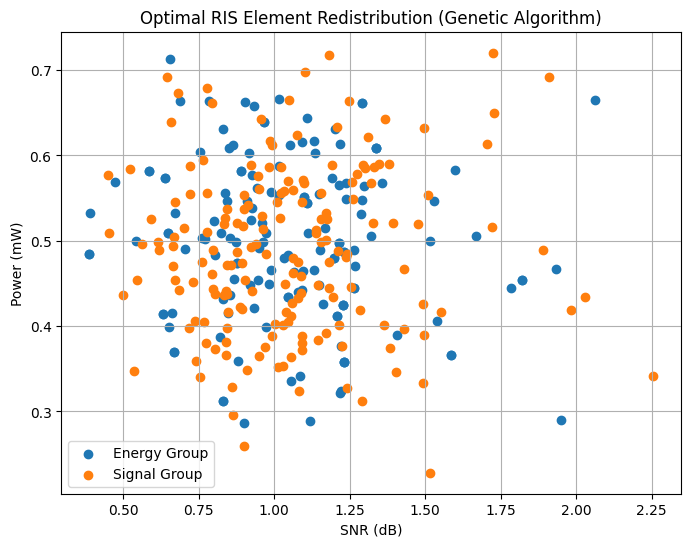

In [123]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 300

elements = np.random.normal(0.5, 0.1, (num_elements, 4))

# Define channel gain and Rayleigh fading parameters
path_loss_exponent = 2.0
noise_power = 0.01

# Genetic Algorithm for optimal redistribution using random initialization
population_size = 100
num_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

best_snr = float('inf')
best_power = float('inf')
best_energy_indices = None
best_signal_indices = None

def calculate_snr_power(energy_indices, signal_indices):
    energy_power = np.sum(elements[energy_indices, 1])  # Total energy power
    signal_power = np.sum(elements[signal_indices, 1])  # Total signal power

    energy_distance = np.sum(elements[energy_indices, 2])  # Sum of distances for energy elements
    signal_distance = np.sum(elements[signal_indices, 2])  # Sum of distances for signal elements

    # Calculate SNR considering Friis free space model
    snr = (signal_power / signal_distance**2) / (energy_power / energy_distance**2)

    # Introduce Rayleigh fading effect
    snr *= np.random.rayleigh()

    power = energy_power + signal_power  # Total power
    return snr, power



def evaluate_fitness(energy_indices, signal_indices):
    snr, power = calculate_snr_power(energy_indices, signal_indices)
    return 1 / (snr * power)  # Minimize the reciprocal of SNR * power

def genetic_algorithm():
    population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
    for _ in range(num_generations):
        new_population = []
        for parent1, parent2 in zip(population[::2], population[1::2]):
            if np.random.rand() < crossover_rate:
                crossover_point = np.random.randint(1, num_elements // 2)
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            else:
                child1 = parent1
                child2 = parent2
            
            for child in [child1, child2]:
                if np.random.rand() < mutation_rate:
                    mutation_index = np.random.randint(num_elements // 2)  # Ensure the mutated index is within bounds
                    child[mutation_index] = np.random.randint(num_elements)        
            new_population.extend([child1, child2])
        
        population = new_population
        population.sort(key=lambda ind: evaluate_fitness(ind, list(set(range(num_elements)) - set(ind))))
        # population = population[:population_size]

        
        best_individual = population[0]
        best_energy_indices = best_individual
        best_signal_indices = list(set(range(num_elements)) - set(best_individual))
        best_snr, best_power = calculate_snr_power(best_energy_indices, best_signal_indices)
        
    return best_energy_indices, best_signal_indices, best_snr, best_power

# Run the Genetic Algorithm
best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# Calculate initial SNR and power
initial_snr, initial_power = calculate_snr_power(range(num_elements // 2), range(num_elements // 2, num_elements))

# Calculate efficiency metrics
snr_improvement_percentage = (abs(best_snr - initial_snr) / initial_snr) * 100
power_reduction_percentage = (abs(initial_power - best_power) / initial_power) * 100
energy_efficiency = (best_snr * best_power) / num_elements
combined_improvement_metric = ((snr_improvement_percentage * power_reduction_percentage) ** 0.5)

# Print optimal groupings and their characteristics
print("Optimal Energy Group Indices:", best_energy_indices)
print("Optimal Signal Group Indices:", best_signal_indices)
print("Initial SNR:", initial_snr, "dB")
print("Initial Power:", initial_power, "mW")
print("Optimal SNR:", best_snr, "dB")
print("Optimal Power:", best_power, "mW")
print("SNR Improvement Percentage:", snr_improvement_percentage, "%")
print("Power Reduction Percentage:", power_reduction_percentage, "%")
print("Energy Efficiency:", energy_efficiency, "SNR * Power / Num Elements")
print("Combined Improvement Metric:", combined_improvement_metric)

# Visualize the efficiency
plt.figure(figsize=(8, 6))
plt.scatter(elements[best_energy_indices, 0] / elements[best_energy_indices, 2], elements[best_energy_indices, 1], label='Energy Group')
plt.scatter(elements[best_signal_indices, 0] / elements[best_signal_indices, 2], elements[best_signal_indices, 1], label='Signal Group')
plt.xlabel('SNR (dB)')
plt.ylabel('Power (mW)')
plt.title('Optimal RIS Element Redistribution (Genetic Algorithm)')
plt.legend()
plt.grid(True)
plt.show()



In [124]:
# import numpy as np
# import matplotlib.pyplot as plt
# from heapq import heappop, heappush

# # Define the grid environment
# grid_size = 11
# num_obstacles = 50
# obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
# start = (0, 0)
# goal = (grid_size - 1, grid_size - 1)

# # A* pathfinding with diagonal movements
# def heuristic(a, b):
#     return abs(a[0] - b[0]) + abs(a[1] - b[1])

# def astar(start, goal, max_iterations=10000):
#     open_list = [(0, start)]
#     came_from = {}
#     g_score = {start: 0}
#     iterations = 0

#     while open_list and iterations < max_iterations:
#         current_g, current = heappop(open_list)
#         if current == goal:
#             path = [goal]
#             while current in came_from:
#                 current = came_from[current]
#                 path.append(current)
#             path.reverse()
#             return path

#         for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
#             neighbor = (current[0] + dx, current[1] + dy)
#             if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
#                 tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
#                 if tentative_g < g_score.get(neighbor, float('inf')):
#                     came_from[neighbor] = current
#                     g_score[neighbor] = tentative_g
#                     f_score = tentative_g + heuristic(neighbor, goal)
#                     heappush(open_list, (f_score, neighbor))

#         iterations += 1

#     return None

# # Find optimal path using A* pathfinding
# path = astar(start, goal, max_iterations=50000)

# if path is not None:
#     # Visualize the path and obstacles
#     plt.figure(figsize=(10, 10))
#     plt.plot([p[0] for p in path], [p[1] for p in path], marker='o', linestyle='-', color='blue', label='Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('A* Pathfinding in Grid Environment with Dynamic Obstacles (Curved Path)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# else:
#     print("Path not found.")

Best Path Option: A*


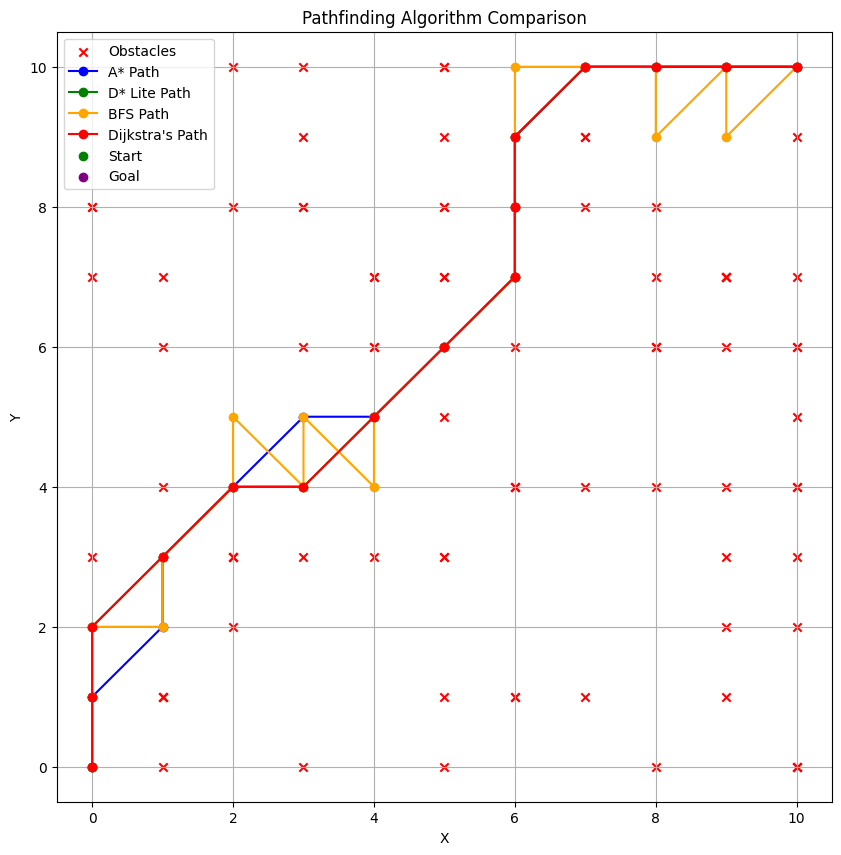

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 80
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_score, neighbor))

        iterations += 1

    return None

def d_star_lite(start, goal):
    open_list = [(0, goal)]
    came_from = {}
    g_score = {goal: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == start:
            path = [start]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, start)
                    heappush(open_list, (f_score, neighbor))

    return None

def bfs(start, goal):
    queue = [start]
    came_from = {}
    visited = set()

    while queue:
        current = queue.pop(0)
        visited.add(current)

        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles and neighbor not in visited:
                queue.append(neighbor)
                came_from[neighbor] = current

    return None

def dijkstra(start, goal):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_list:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g
                    heappush(open_list, (f_score, neighbor))

    return None

# Find optimal path using A* pathfinding
path_astar = astar(start, goal, max_iterations=50000)

# Find optimal path using D* Lite
path_d_star_lite = d_star_lite(start, goal)

# Find optimal path using Breadth-First Search
path_bfs = bfs(start, goal)

# Find optimal path using Dijkstra's algorithm
path_dijkstra = dijkstra(start, goal)

# Calculate path lengths
path_lengths = {
    "A*": len(path_astar) if path_astar is not None else float('inf'),
    "D* Lite": len(path_d_star_lite) if path_d_star_lite is not None else float('inf'),
    "BFS": len(path_bfs) if path_bfs is not None else float('inf'),
    "Dijkstra's": len(path_dijkstra) if path_dijkstra is not None else float('inf')
}

# Store obstacle coordinates and optimal path coordinates
optimal_path_coords = best_option  # Replace with the variable storing the optimal path coordinates
stored_obstacles = obstacles.copy()

# ... (rest of the code)

# Use the stored obstacle coordinates and optimal path coordinates in the third and fourth snippets
# Pass stored_obstacles and optimal_path_coords as inputs to the relevant functions

# Find the shortest path
best_option = min(path_lengths, key=path_lengths.get)

# Print the best option
print("Best Path Option:", best_option)

# Visualize the paths and obstacles
plt.figure(figsize=(10, 10))

# # A* path
# if path_astar is not None:
#     plt.subplot(2, 2, 1)
#     plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('A* Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("A* path not found.")

# # D* Lite path
# if path_d_star_lite is not None:
#     plt.subplot(2, 2, 2)
#     plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('D* Lite Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("D* Lite path not found.")

# # Breadth-First Search path
# if path_bfs is not None:
#     plt.subplot(2, 2, 3)
#     plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title('Breadth-First Search Pathfinding')
#     plt.legend()
#     plt.grid(True)
# else:
#     print("BFS path not found.")

# # Dijkstra's path
# if path_dijkstra is not None:
#     plt.subplot(2, 2, 4)
#     plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")
#     plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
#     plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
#     plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.title("Dijkstra's Algorithm")
#     plt.legend()
#     plt.grid(True)
# else:
#     print("Dijkstra's path not found.")

# plt.tight_layout()
# plt.show()
# Plotting obstacles
plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')

# Plot all paths
if path_astar is not None:
    plt.plot([p[0] for p in path_astar], [p[1] for p in path_astar], marker='o', linestyle='-', color='blue', label='A* Path')

if path_d_star_lite is not None:
    plt.plot([p[0] for p in path_d_star_lite], [p[1] for p in path_d_star_lite], marker='o', linestyle='-', color='green', label='D* Lite Path')

if path_bfs is not None:
    plt.plot([p[0] for p in path_bfs], [p[1] for p in path_bfs], marker='o', linestyle='-', color='orange', label='BFS Path')

if path_dijkstra is not None:
    plt.plot([p[0] for p in path_dijkstra], [p[1] for p in path_dijkstra], marker='o', linestyle='-', color='red', label="Dijkstra's Path")

plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pathfinding Algorithm Comparison')
plt.legend()
plt.grid(True)
plt.show()

Original Path: [(0, 0), (0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (5, 6), (6, 7), (6, 8), (6, 9), (7, 10), (8, 10), (9, 10), (10, 10)]


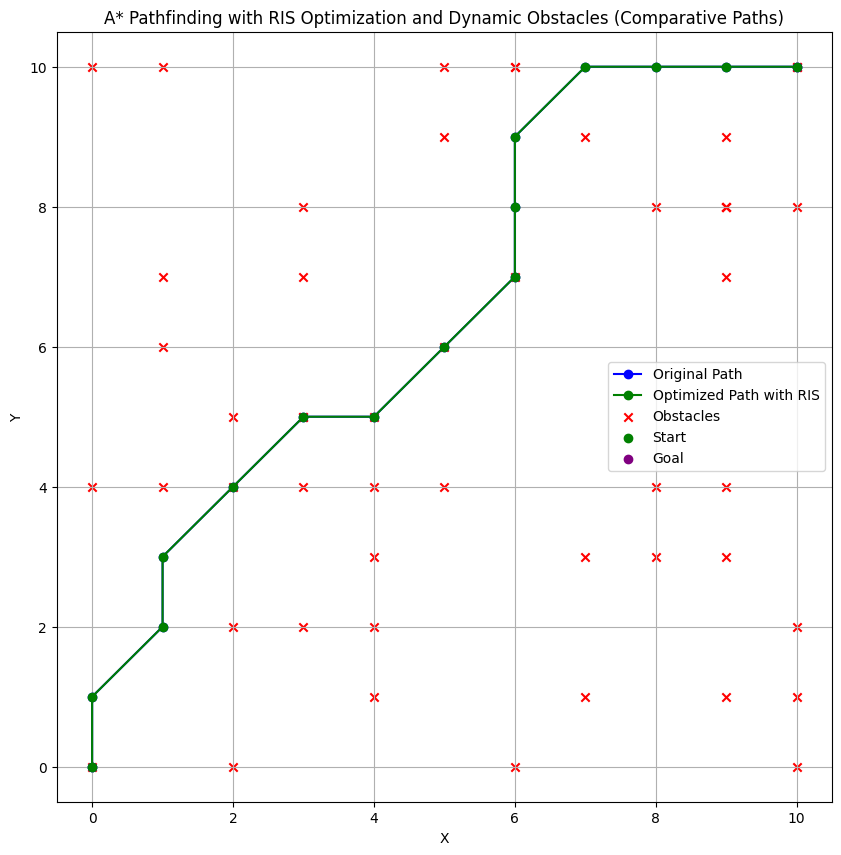

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# A* pathfinding with diagonal movements
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Calculate SNR improvement and power reduction for the current element
def calculate_metrics(current, goal, ris_indices):
    # Your calculations for snr_improvement and power_reduction here
    # For now, let's assume they are equal to zero
    snr_improvement = 0
    power_reduction = 0
    return snr_improvement, power_reduction

# Combine metrics with defined weightings
def combined_cost(current, goal, ris_indices):
    pathfinding_cost = heuristic(current, goal)
    snr_improvement, power_reduction = calculate_metrics(current, goal, ris_indices)
    w_pathfinding = 0.5  # Weight for pathfinding cost
    w_snr_improvement = 0.3  # Weight for SNR improvement
    w_power_reduction = 0.2  # Weight for power reduction
    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
    return total_cost

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in stored_obstacles:  # Use the stored obstacles
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    snr_improvement, power_reduction = calculate_metrics(neighbor, goal, best_energy_indices)
                    pathfinding_cost = heuristic(neighbor, goal)
                    w_pathfinding = 0.5  # Weight for pathfinding cost
                    w_snr_improvement = 0.3  # Weight for SNR improvement
                    w_power_reduction = 0.2  # Weight for power reduction
                    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
                    heappush(open_list, (total_cost, neighbor))

        iterations += 1

    return None

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    
    # Original A* path
    path_original = astar_with_ris(start, goal, max_iterations=30000)  # Calculate the original A* path
    print("Original Path:", path_original)  # Add this line to print the original path
    if path_original:
        plt.plot([p[0] for p in path_original], [p[1] for p in path_original], marker='o', linestyle='-', color='blue', label='Original Path')

    # Optimized A* path with RIS optimization
    plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='green', label='Optimized Path with RIS')
        
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('A* Pathfinding with RIS Optimization and Dynamic Obstacles (Comparative Paths)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Path not found.")




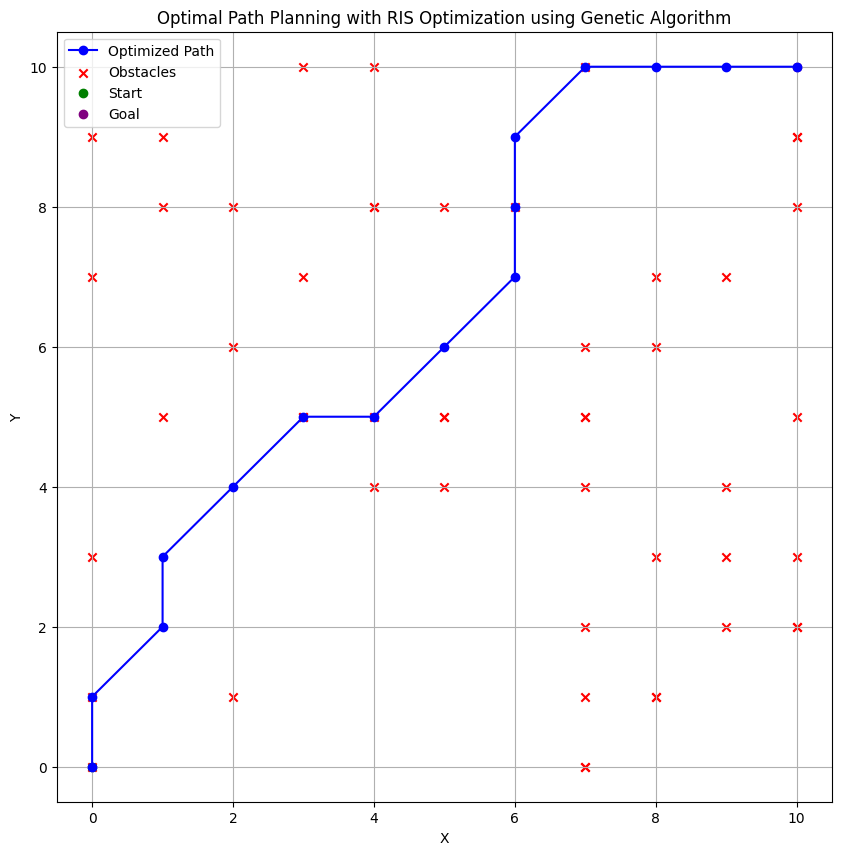

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the grid environment
grid_size = 11
num_obstacles = 50
obstacles = [(np.random.randint(0, grid_size), np.random.randint(0, grid_size)) for _ in range(num_obstacles)]
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)

# Generate simulated data for RIS elements' characteristics (channel conditions, energy levels, signal reception)
num_elements = 100
elements = np.random.normal(0.5, 0.1, (num_elements, 4))

# Genetic Algorithm for optimal redistribution of RIS elements
def genetic_algorithm(population_size=1000, num_generations=1000, mutation_rate=0.2):
    population = [np.random.choice(range(num_elements), num_elements // 2, replace=False) for _ in range(population_size)]
    
    for _ in range(num_generations):
        new_population = []
        
        for _ in range(population_size // 2):
            parent1_idx = np.random.randint(population_size)
            parent2_idx = np.random.randint(population_size)
            parent1 = population[parent1_idx]
            parent2 = population[parent2_idx]
            
            crossover_point = np.random.randint(1, num_elements // 2)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_elements // 2)
                child1[mutation_index] = np.random.randint(num_elements)
            
            if np.random.rand() < mutation_rate:
                mutation_index = np.random.randint(num_elements // 2)
                child2[mutation_index] = np.random.randint(num_elements)
            
            new_population.extend([child1, child2])
        
        population = new_population
    
    best_energy_indices = population[np.argmin([calculate_metrics(None, None, indices)[0] for indices in population])]
    best_signal_indices = np.array(list(set(range(num_elements)) - set(best_energy_indices)))
    best_snr, best_power = calculate_metrics(None, None, best_energy_indices)
    
    return best_energy_indices, best_signal_indices, best_snr, best_power


# A* pathfinding with diagonal movements and RIS optimization
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def calculate_snr_power(energy_indices, signal_indices):
    energy_power = np.sum(elements[energy_indices, 1])  # Total energy power
    signal_power = np.sum(elements[signal_indices, 1])  # Total signal power

    energy_distance = np.sum(elements[energy_indices, 2])  # Sum of distances for energy elements
    signal_distance = np.sum(elements[signal_indices, 2])  # Sum of distances for signal elements

    # Calculate SNR considering Friis free space model
    snr = (signal_power / signal_distance**2) / (energy_power / energy_distance**2)

    # Introduce Rayleigh fading effect
    snr *= np.random.rayleigh()

    power = energy_power + signal_power  # Total power
    return snr, power

def astar_with_ris(start, goal, max_iterations=30000):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    iterations = 0

    while open_list and iterations < max_iterations:
        current_g, current = heappop(open_list)
        if current == goal:
            path = [goal]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in stored_obstacles:  # Use the stored obstacles
                tentative_g = g_score[current] + np.sqrt(dx ** 2 + dy ** 2)
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    snr_improvement, power_reduction = calculate_metrics(neighbor, goal, best_energy_indices)
                    pathfinding_cost = heuristic(neighbor, goal)
                    w_pathfinding = 0.5  # Weight for pathfinding cost
                    w_snr_improvement = 0.3  # Weight for SNR improvement
                    w_power_reduction = 0.2  # Weight for power reduction
                    total_cost = w_pathfinding * pathfinding_cost + w_snr_improvement * snr_improvement + w_power_reduction * power_reduction
                    heappush(open_list, (total_cost, neighbor))

        iterations += 1

    return None


# Run the Genetic Algorithm
best_energy_indices, best_signal_indices, best_snr, best_power = genetic_algorithm()

# Find optimal path using A* pathfinding with RIS optimization
path_with_ris = astar_with_ris(start, goal, max_iterations=50000)

if path_with_ris is not None:
    # Visualize the original and optimized paths along with obstacles
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in path_with_ris], [p[1] for p in path_with_ris], marker='o', linestyle='-', color='blue', label='Optimized Path')
    plt.scatter([o[0] for o in obstacles], [o[1] for o in obstacles], color='red', marker='x', label='Obstacles')
    plt.scatter(start[0], start[1], color='green', marker='o', label='Start')
    plt.scatter(goal[0], goal[1], color='purple', marker='o', label='Goal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Optimal Path Planning with RIS Optimization using Genetic Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Path not found.")
